### Import Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
import string 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout

import warnings
warnings.filterwarnings('ignore')

import os

### Load and Check Data

In [22]:
real_data = pd.read_csv('True.csv')
fake_data = pd.read_csv('Fake.csv')

In [23]:
real_data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [24]:
fake_data.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [25]:
#add column 
real_data['target'] = 1
fake_data['target'] = 0 

In [26]:
#Merging the 2 datasets
data = pd.concat([real_data, fake_data], ignore_index=True, sort=False)
data.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  target  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1

In [7]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

0    23481
1    21417
Name: target, dtype: int64


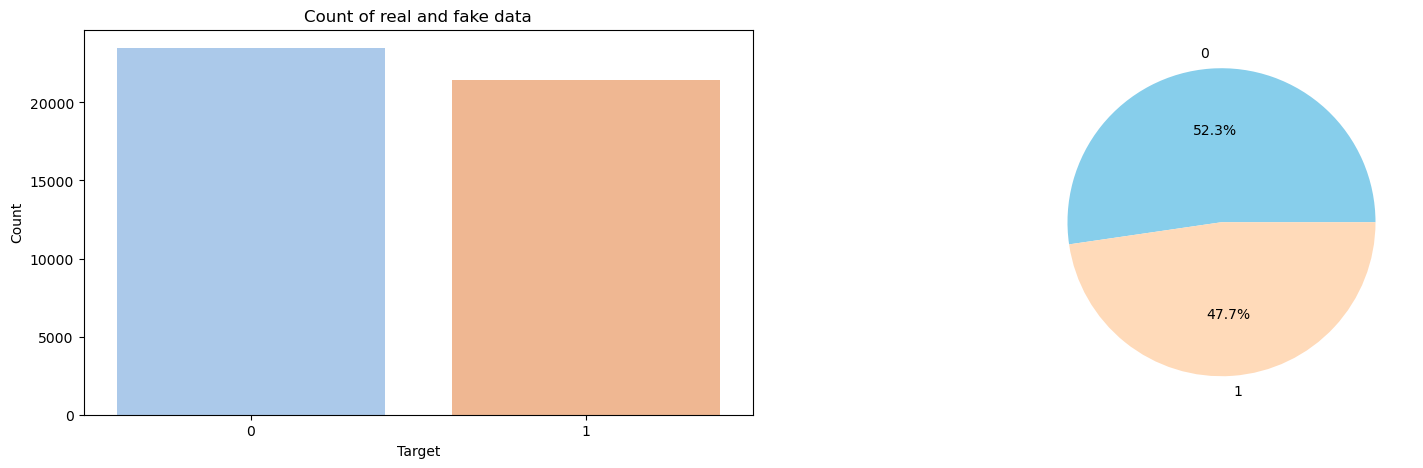

In [27]:
### Count of Fake and Real Data

print(data["target"].value_counts())
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.countplot(data.target,ax=ax[0],palette="pastel");
g1.set_title("Count of real and fake data")
g1.set_ylabel("Count")
g1.set_xlabel("Target")
g2 = plt.pie(data["target"].value_counts().values,explode=[0,0],labels=data.target.value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

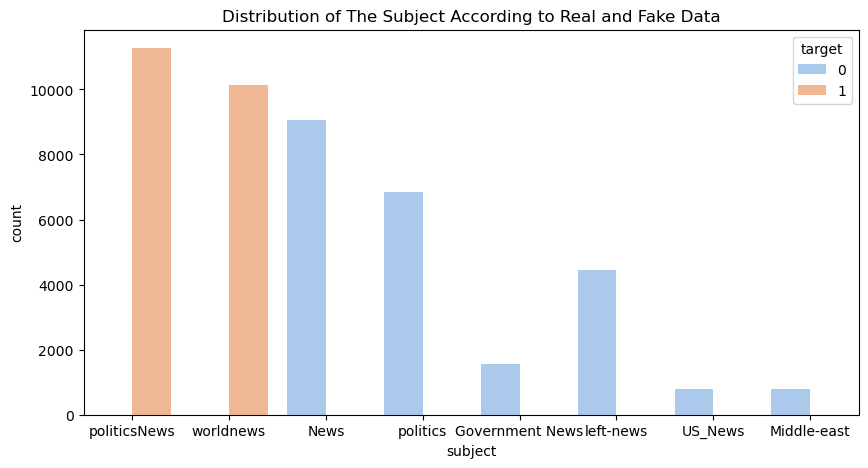

In [28]:
#Distribution of The Subject According to Real and Fake Datab
plt.figure(figsize=(10, 5))

ax = sns.countplot(x="subject",  hue='target', data=data, palette="pastel")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [29]:
data.drop(["subject", "date","title"], axis=1,inplace=True)

In [30]:
data.head()

text  target
0  WASHINGTON (Reuters) - The head of a conservat...       1
1  WASHINGTON (Reuters) - Transgender people will...       1
2  WASHINGTON (Reuters) - The special counsel inv...       1
3  WASHINGTON (Reuters) - Trump campaign adviser ...       1
4  SEATTLE/WASHINGTON (Reuters) - President Donal...       1

In [31]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stemmer = WordNetLemmatizer()
nltk.download('stopwords')

def clean_txt(x):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(x))
    #Removal of Punctuation Marks
    document = re.sub('\[[^]]*\]', '', document)
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Converting to Lowercase
    
    document = document.lower()
   
    document = word_tokenize(document)
    
    document = [word for word in document if word not in stopwords.words('english')]

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    return document

[nltk_data] Downloading package stopwords to C:\Users\Mohamed
[nltk_data]     Mousa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
data['text'] = data['text'].apply(lambda x:clean_txt(x))

In [33]:
clean_data = data

In [35]:
import pickle
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)

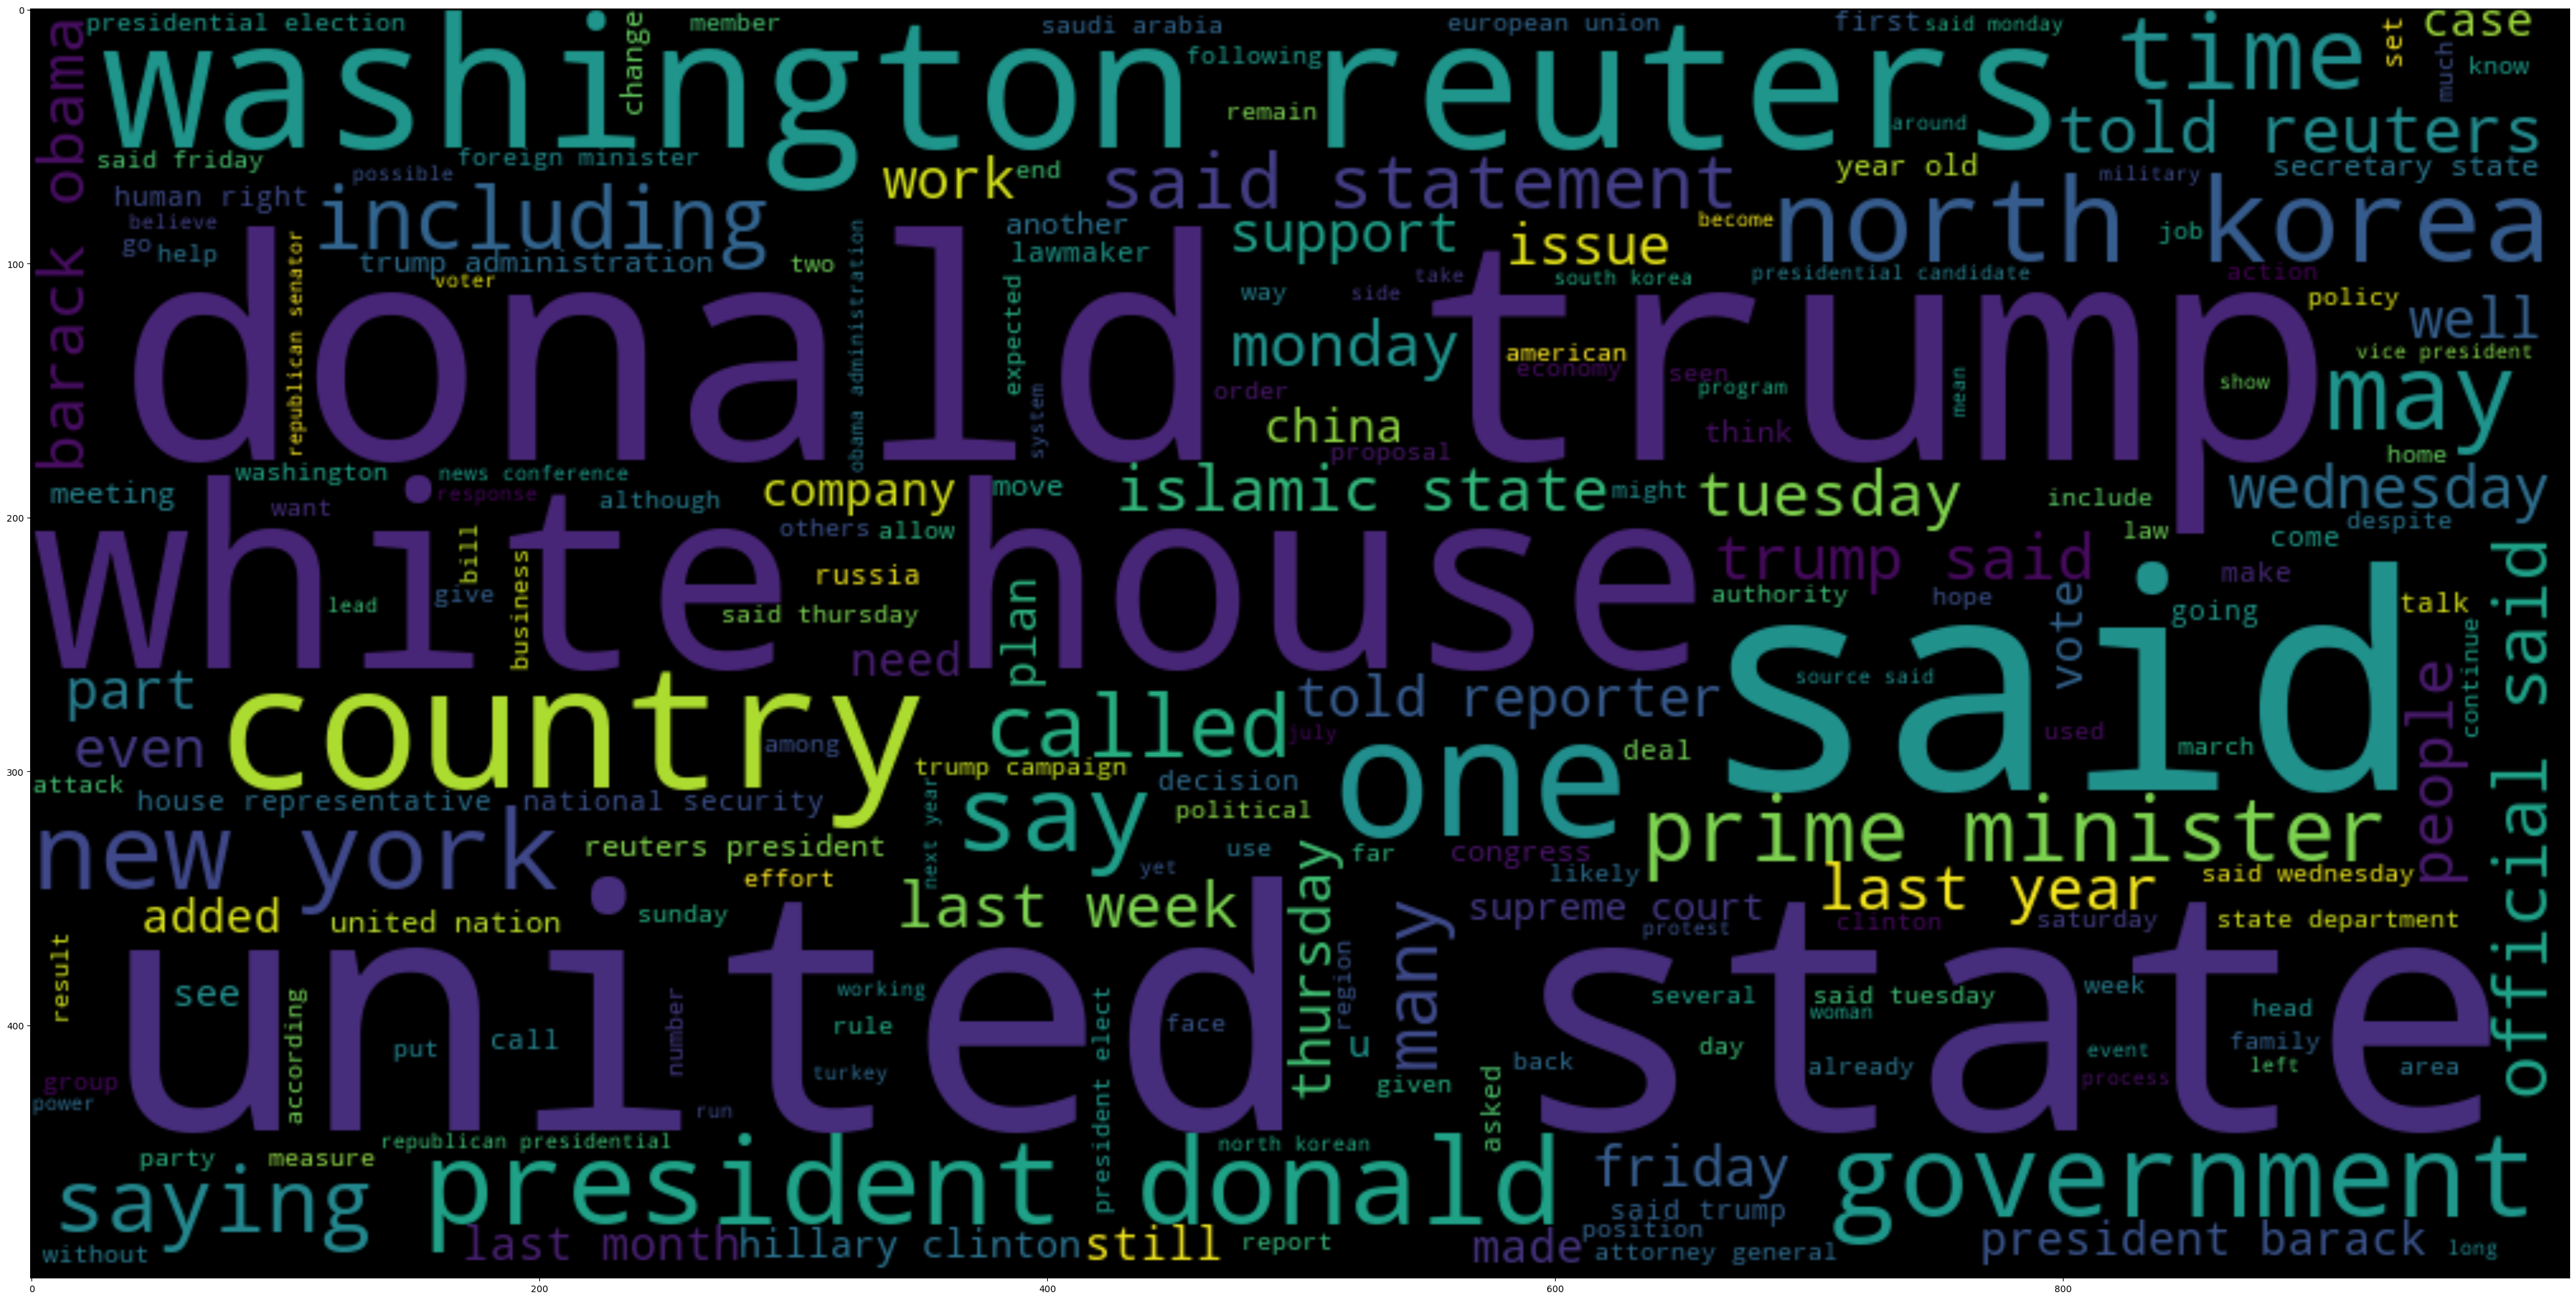

In [36]:
### WordCloud for Real News


from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (50,50))
wc = WordCloud(max_words = 200 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

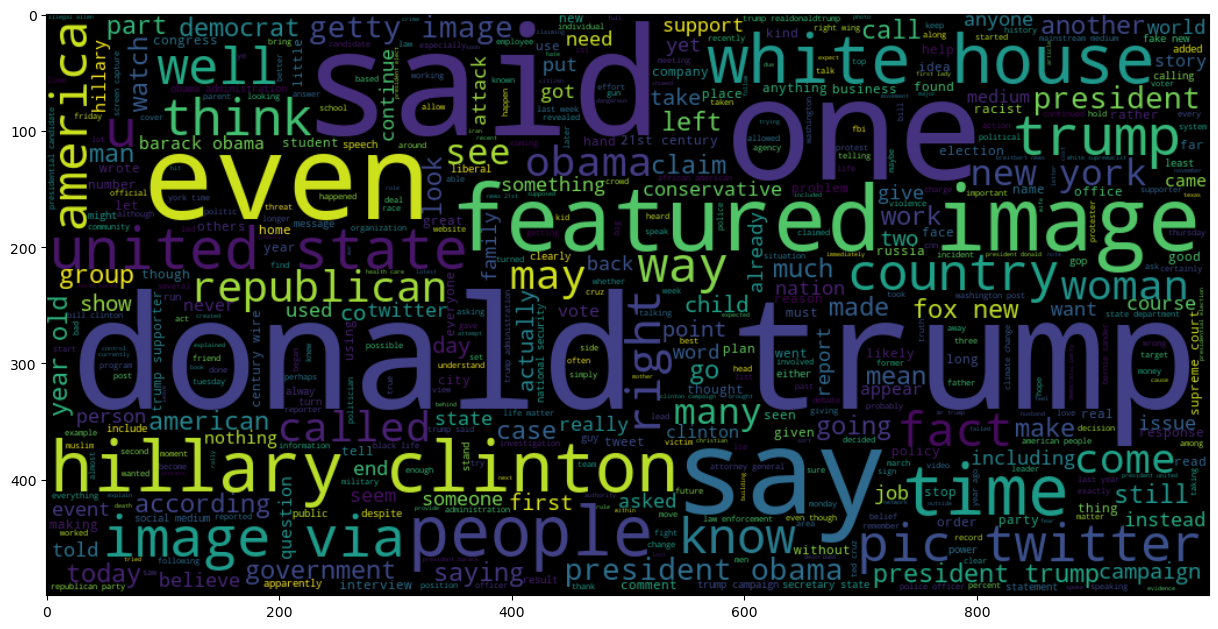

In [37]:
### WordCloud for Fake News

plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

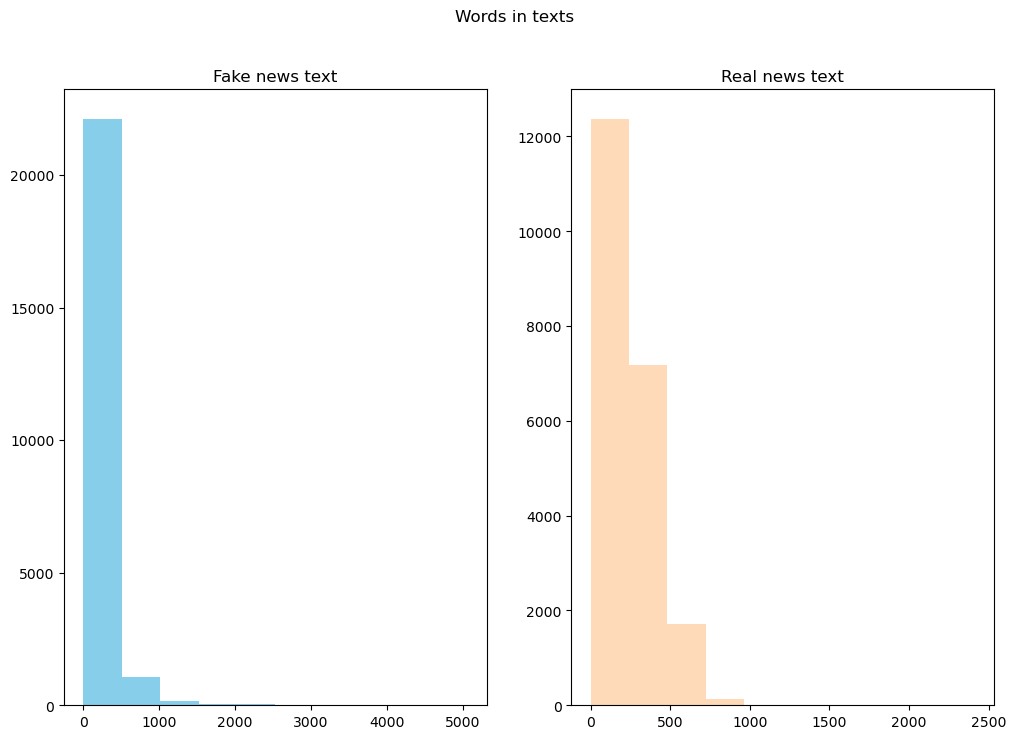

In [38]:
#### Number of words in each text

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=data[data['target']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Fake news text')
text_len=data[data['target']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Real news text')
fig.suptitle('Words in texts')
plt.show()

### spliting data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], random_state=0)

### Tokenization

In [19]:
max_features = 10000
maxlen = 300

In [42]:
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D

In [43]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
max_phrase_len= max(len(seq) for seq in X_train)
X_train = pad_sequences(X_train, maxlen = max_phrase_len)
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen = max_phrase_len)
max_words = len(tokenizer.word_index)+1

### building model

In [ ]:
batch_size = 256
epochs = 10
embed_size = 100

In [46]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_words, output_dim=256, input_length=max_phrase_len))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [2]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=64, shuffle=True, verbose = 1)

NameError: name 'model' is not defined

In [ ]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
pred = model.predict_classes(X_test)
print(classification_report(y_test, pred, target_names = ['Fake','Real']))